In [1]:
import supereeg as se
import pandas as pd
import numpy as np
import os
from scipy import stats
import hypertools as hyp
import plot as plot
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from nilearn import plotting as ni_plt

In [2]:
fig_dir = '../../paper/figs/source/corrmap'

In [3]:
nii_bo_dir = '../../data/niis'
corrmap_nii_bo_dir = os.path.join(nii_bo_dir, 'corrmap')
if not os.path.exists(corrmap_nii_bo_dir):
    os.makedirs(corrmap_nii_bo_dir)

In [4]:
ram_data_dir = '../../data/ram'
pyfr_data_dir = '../../data/pyfr'

In [5]:
ram_freq_dir = os.path.join(ram_data_dir, 'freq')
pyfr_freq_dir = os.path.join(pyfr_data_dir, 'freq')

In [6]:
freqs = ['delta', 'theta', 'alpha', 'beta', 'lgamma', 'hgamma', 'broadband']

# PyFR analysis

In [7]:
pyFR_raw_df = pd.read_csv(os.path.join(pyfr_freq_dir, 'raw.csv'), index_col=0)

In [8]:
pyFR_raw_df.head()

,across,within,Subject,R,Sample rate,Samples,Thresholded electrodes,Sessions,Number thresholded,Total time (h),Average session length (h),Total electrodes,Proportion thresholded
0,0.527127,0.073618,TJ004,[ 39.39 -30.17 -18.43],250.0,645500,53,1.0,3,0.717,0.717,56,0.054
1,0.744310,0.114744,UP004,[ 29.29 -20.85 4.34],250.0,12786750,54,6.0,33,14.208,2.368,87,0.379
2,0.610730,0.553010,CH042,[-45.45 -5.51 -39.65],250.0,1668500,83,3.0,3,1.854,0.618,86,0.035
3,0.536786,0.380651,FR037,[ 65.66 -25.38 12.81],250.0,288500,59,1.0,4,0.321,0.321,63,0.063
4,0.034365,0.472219,CH003,[-19.19 1.8 -41.61],250.0,2428415,60,3.0,4,2.698,0.899,64,0.062


## make dataframe with z-transformed correlation coefficients 

In [9]:
corr_pyfr_df = pd.DataFrame()
corr_pyfr_df['Subject'] = pyFR_raw_df['Subject']
corr_pyfr_df['within'] = plot.r2z(pyFR_raw_df['within'])
corr_pyfr_df['across'] = plot.r2z(pyFR_raw_df['across'])
corr_pyfr_df['R'] = pyFR_raw_df['R']


## number of electrode

In [10]:
pyFR_raw_df.shape

(4168, 13)

## mean for the across correlations for all electrodes for pyfr

In [11]:
plot.z2r(corr_pyfr_df['across'].mean())

0.5118426491549634

## mean for the within correlations for all electrodes for pyfr

In [12]:
plot.z2r(corr_pyfr_df['within'].mean())

0.3195398880727385

## Across vs within subject analysis

one sided t test for across: 
Ttest_1sampResult(statistic=23.550985443194364, pvalue=7.856191716779956e-34)
one sided t test for within: 
Ttest_1sampResult(statistic=15.164007032556674, pvalue=3.4545054040795764e-23)
t test: 
Ttest_relResult(statistic=9.174870505143545, pvalue=2.129459333485525e-13)


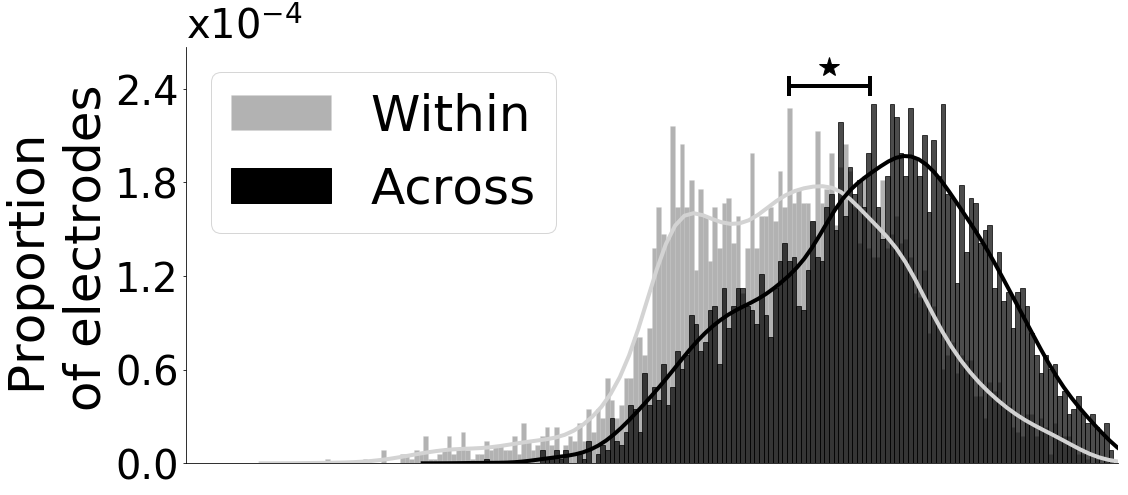

In [13]:
outfile = os.path.join(fig_dir, 'pyfr_raw_hist.pdf')
plot.plot_2_histograms(corr_pyfr_df, 'within', 'across', xticks=False, outfile=outfile) 
plt.show()

## patient average of z-tranformed correlation coefficients 

In [14]:
grouped_results = corr_pyfr_df.groupby('Subject')['within', 'across'].mean()
t_stat_group = stats.ttest_rel(grouped_results['across'],grouped_results['within'])

In [15]:
grouped_results.shape

(67, 2)

## paired ttest

In [16]:
t_stat_group

Ttest_relResult(statistic=9.174870505143545, pvalue=2.129459333485525e-13)

## plot correlations 

In [17]:
pyfr_locs = plot.compile_df_locs(pyFR_raw_df['R'])
corr_pyfr_locs = np.atleast_2d(pyFR_raw_df['across'])

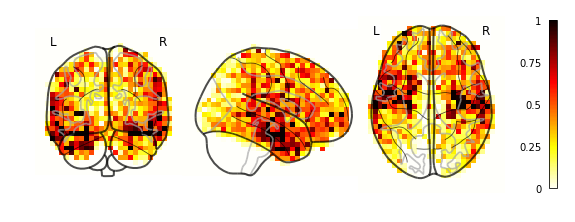

In [18]:
## use width and voxel == 2 for paper fig
plot.interp_corr(pyfr_locs,  np.atleast_2d(corr_pyfr_locs), width=6, vox_size=6, outfile=None, save_nii=None)

# save brain object for visbrain projection

In [19]:
bo_nii = se.Brain(data=corr_pyfr_locs, locs=pyfr_locs)
bo_file = os.path.join(corrmap_nii_bo_dir, 'pyfr_raw_corrmap')
bo_nii.save(bo_file)

delta
(4168, 13)
Ttest_relResult(statistic=8.59011549172962, pvalue=2.333193957456436e-12)


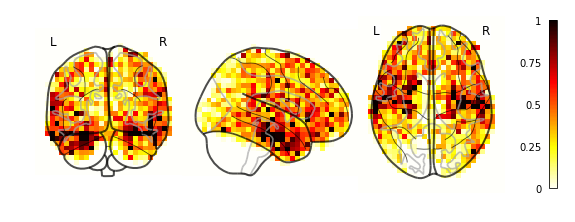

theta
(4168, 13)
Ttest_relResult(statistic=11.555650859940519, pvalue=1.6561206523107133e-17)


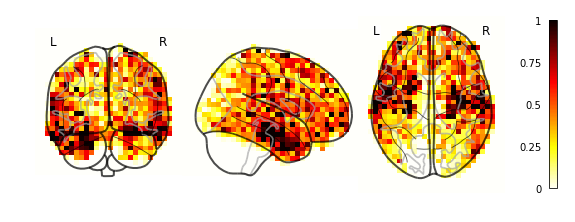

alpha
(4168, 13)
Ttest_relResult(statistic=7.7865917957921384, pvalue=6.380745891998458e-11)


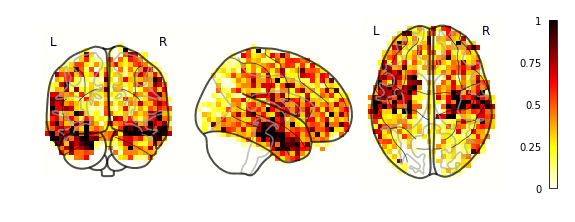

beta
(4168, 13)
Ttest_relResult(statistic=9.08438934960274, pvalue=3.080449453201798e-13)


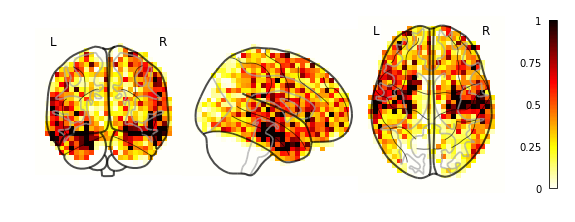

lgamma
(4168, 13)
Ttest_relResult(statistic=2.651151184024991, pvalue=0.010033234027644966)


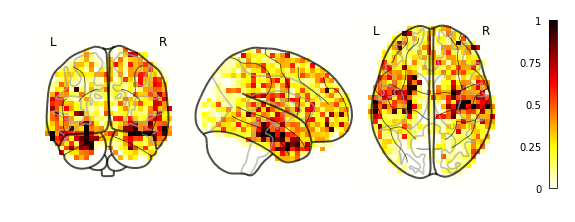

hgamma
(4168, 13)
Ttest_relResult(statistic=-0.35474178805422735, pvalue=0.7239140749762669)


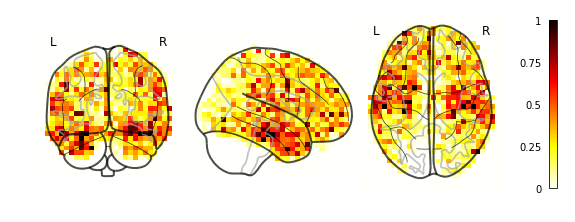

broadband
(4168, 13)
Ttest_relResult(statistic=5.1672910679795665, pvalue=2.384463374633195e-06)


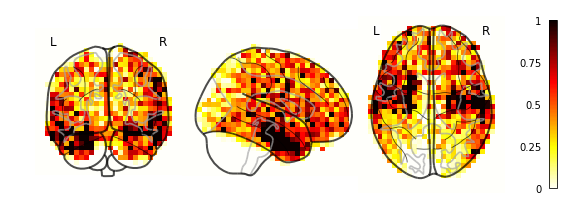

In [20]:
for f in freqs:
    pyFR_f_df = pd.read_csv(os.path.join(pyfr_freq_dir, f + '.csv'), index_col=0)
    corr_f_df = pd.DataFrame()
    corr_f_df['Subject'] = pyFR_f_df['Subject']
    corr_f_df['within'] = plot.r2z(pyFR_f_df['within'])
    corr_f_df['across'] = plot.r2z(pyFR_f_df['across'])
    corr_f_df['R'] = pyFR_f_df['R']
    print(f)
    print(pyFR_f_df.shape)
    grouped_results = corr_f_df.groupby('Subject')['within', 'across'].mean()
    t_stat_group = stats.ttest_rel(grouped_results['across'],grouped_results['within'])
    print(t_stat_group)
    pyfr_locs = plot.compile_df_locs(pyFR_f_df['R'])
    corr_pyfr_locs = np.atleast_2d(pyFR_f_df['across'])
    plot.interp_corr(pyfr_locs,  np.atleast_2d(corr_pyfr_locs), width=6, vox_size=6, outfile=None, save_nii=None)
    #     bo_nii = se.Brain(data=corr_pyfr_locs, locs=pyfr_locs)
    #     bo_file = os.path.join(corrmap_nii_bo_dir, 'pyfr_' + f+ '_corrmap')
    #     bo_nii.save(bo_file)

# RAM analysis

In [21]:
RAM_raw_df = pd.read_csv(os.path.join(ram_freq_dir, 'raw.csv'), index_col=0)

In [22]:
RAM_raw_df.head()

,across,within,Subject,R,Sample rate,Samples,Thresholded electrodes,Sessions,Number thresholded,Total time (h),Average session length (h),Total electrodes,Proportion thresholded
0,0.932597,0.266611,R1230J_RAM_CatFR1_0,[-19.77 45.9 34.9 ],250.0,883281,169,0.0,9,0.981,inf,178,0.051
1,0.873678,0.106436,R1201P_RAM_FR1_1,[ 51.4 -63.95 50.53],250.0,1570289,105,1.0,20,1.745,1.745000,125,0.160
2,0.155780,0.323223,R1075J_RAM_FR1_0,[-34.66 50.07 25.13],250.0,1410000,89,1.0,31,1.567,1.567000,120,0.258
3,0.902919,0.436317,R1204T_RAM_CatFR1_0,[55.28 14.73 17.77],250.0,756284,117,0.0,9,0.840,inf,126,0.071
4,0.999702,0.035476,R1093J_RAM_CatFR1_0,[-38.98 7.21 -73.77],250.0,713250,80,0.0,32,0.792,inf,112,0.286


## make dataframe with z-transformed correlation coefficients 

In [23]:
corr_ram_df = pd.DataFrame()
corr_ram_df['Subject'] = RAM_raw_df['Subject']
corr_ram_df['within'] = plot.r2z(RAM_raw_df['within'])
corr_ram_df['across'] = plot.r2z(RAM_raw_df['across'])
corr_ram_df['R'] = RAM_raw_df['R']


## number of electrode

In [24]:
RAM_raw_df.shape

(5023, 13)

## mean for the within correlations for all electrodes for ram


In [25]:
plot.z2r(corr_ram_df['across'].mean())

0.5908565275858905

## mean for the within correlations for all electrodes for ram

In [26]:
plot.z2r(corr_ram_df['within'].mean())

0.22837927102179895

## Across vs within subject analysis

one sided t test for across: 
Ttest_1sampResult(statistic=16.209939501291224, pvalue=1.5529240052388738e-26)
one sided t test for within: 
Ttest_1sampResult(statistic=13.175458375544055, pvalue=2.014678611797562e-21)
t test: 
Ttest_relResult(statistic=11.253021840000253, pvalue=6.260347534014689e-18)


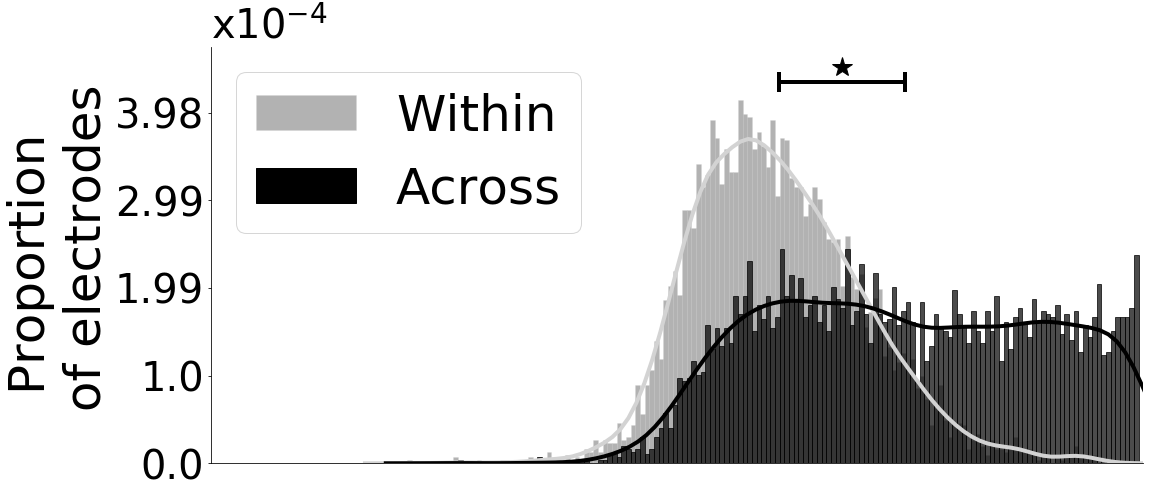

In [27]:
outfile = os.path.join(fig_dir, 'ram_raw_hist.pdf')
plot.plot_2_histograms(corr_ram_df, 'within', 'across', xticks=False, outfile=outfile) 
plt.show()

## patient average of z-tranformed correlation coefficients 

In [28]:
grouped_results = corr_ram_df.groupby('Subject')['within', 'across'].mean()
t_stat_group = stats.ttest_rel(grouped_results['across'],grouped_results['within'])

In [29]:
grouped_results.shape

(78, 2)

## paired ttest

In [30]:
t_stat_group

Ttest_relResult(statistic=11.253021840000253, pvalue=6.260347534014689e-18)

## plot correlations 

In [31]:
ram_locs = plot.compile_df_locs(RAM_raw_df['R'])
corr_ram_locs = np.atleast_2d(RAM_raw_df['across'])

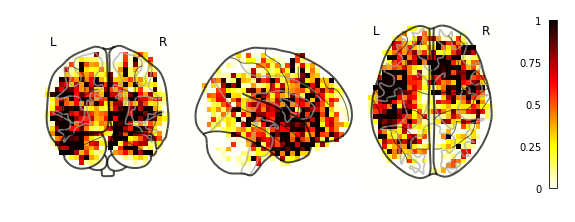

In [32]:
## use width and voxel == 2 for paper fig
plot.interp_corr(ram_locs,  np.atleast_2d(corr_ram_locs), width=6, vox_size=6, outfile=None, save_nii=None)

## save brain object for visbrain projection

In [33]:
bo_nii = se.Brain(data=corr_ram_locs, locs=ram_locs)
bo_file = os.path.join(corrmap_nii_bo_dir, 'ram_raw_corrmap')
bo_nii.save(bo_file)

# RAM by frequency

delta
(5023, 13)
Ttest_relResult(statistic=11.206106994731748, pvalue=7.655995471241806e-18)


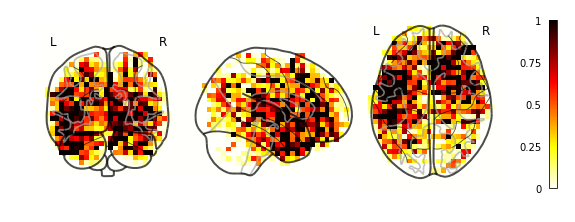

theta
(5023, 13)
Ttest_relResult(statistic=11.64523106540291, pvalue=1.1740090891994886e-18)


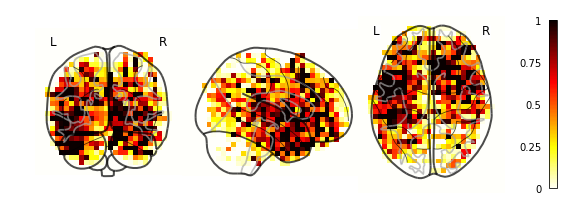

alpha
(5023, 13)
Ttest_relResult(statistic=11.877751335768844, pvalue=4.385467855518069e-19)


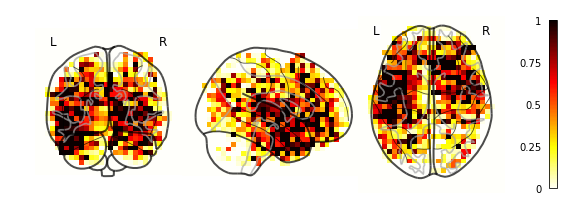

beta
(5023, 13)
Ttest_relResult(statistic=11.293278478746652, pvalue=5.26834999412178e-18)


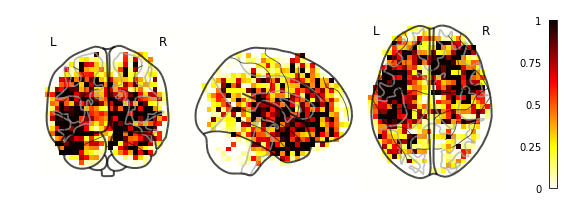

lgamma
(5023, 13)
Ttest_relResult(statistic=6.068521858258876, pvalue=4.5284072629347134e-08)


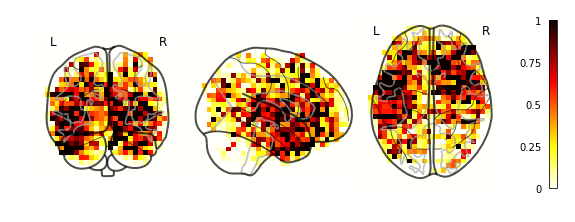

hgamma
(5023, 13)
Ttest_relResult(statistic=3.4592862713540864, pvalue=0.0008859104348482024)


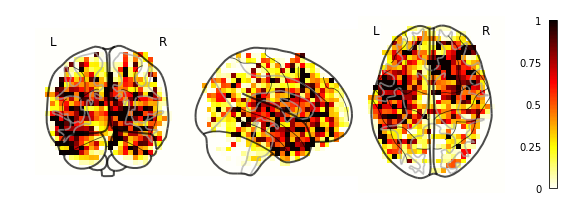

broadband
(5023, 13)
Ttest_relResult(statistic=9.491117895980638, pvalue=1.361503224509219e-14)


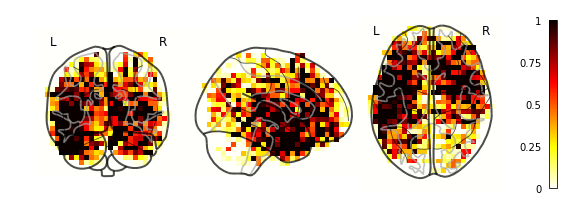

In [34]:
for f in freqs:
    RAM_f_df = pd.read_csv(os.path.join(ram_freq_dir, f + '.csv'), index_col=0)
    corr_f_df = pd.DataFrame()
    corr_f_df['Subject'] = RAM_f_df['Subject']
    corr_f_df['within'] = plot.r2z(RAM_f_df['within'])
    corr_f_df['across'] = plot.r2z(RAM_f_df['across'])
    corr_f_df['R'] = RAM_f_df['R']
    print(f)
    print(RAM_f_df.shape)
    grouped_results = corr_f_df.groupby('Subject')['within', 'across'].mean()
    t_stat_group = stats.ttest_rel(grouped_results['across'],grouped_results['within'])
    print(t_stat_group)
    ram_locs = plot.compile_df_locs(RAM_f_df['R'])
    corr_ram_locs = np.atleast_2d(RAM_f_df['across'])
    plot.interp_corr(ram_locs,  np.atleast_2d(corr_ram_locs), width=6, vox_size=6, outfile=None, save_nii=None)
    
#     bo_nii = se.Brain(data=corr_ram_locs, locs=ram_locs)
#     bo_file = os.path.join(corrmap_nii_bo_dir, 'ram_' + f+ '_corrmap')
#     bo_nii.save(bo_file)

# RAM subset
### limited to patients with both experiments

In [35]:
RAM_df = pd.read_csv(os.path.join(ram_data_dir, 'ram.csv'), index_col=0)

In [36]:
RAM_df.shape

(3159, 20)

In [37]:
all_subject = np.array([])
all_within = np.array([])
all_across = np.array([])
all_R = np.array([])
for i , item in enumerate(RAM_df['Subject'].values):
    all_subject = np.append(all_subject, item)
    all_within = np.append(all_within, RAM_df['W_w_w'].iloc[i])
    all_across = np.append(all_across, RAM_df['W_a_w'].iloc[i])
    all_R = np.append(all_R, RAM_df['R'].iloc[i])

In [38]:
corr_all_df = pd.DataFrame()
corr_all_df['Subject'] = all_subject
corr_all_df['W_w_w'] = plot.r2z(all_within)
corr_all_df['W_a_w'] = plot.r2z(all_across)
corr_all_df['R'] = all_R

In [39]:
plot.z2r(corr_all_df['W_a_w'].mean())

0.6814183001347242

In [40]:
plot.z2r(corr_all_df['W_w_w'].mean())

0.21624048394696144

one sided t test for across: 
Ttest_1sampResult(statistic=9.748726184885673, pvalue=1.2329279252356298e-09)
one sided t test for within: 
Ttest_1sampResult(statistic=7.8805823231258865, pvalue=5.5464344409257696e-08)
t test: 
Ttest_relResult(statistic=6.930163974276389, pvalue=4.5901965099743084e-07)


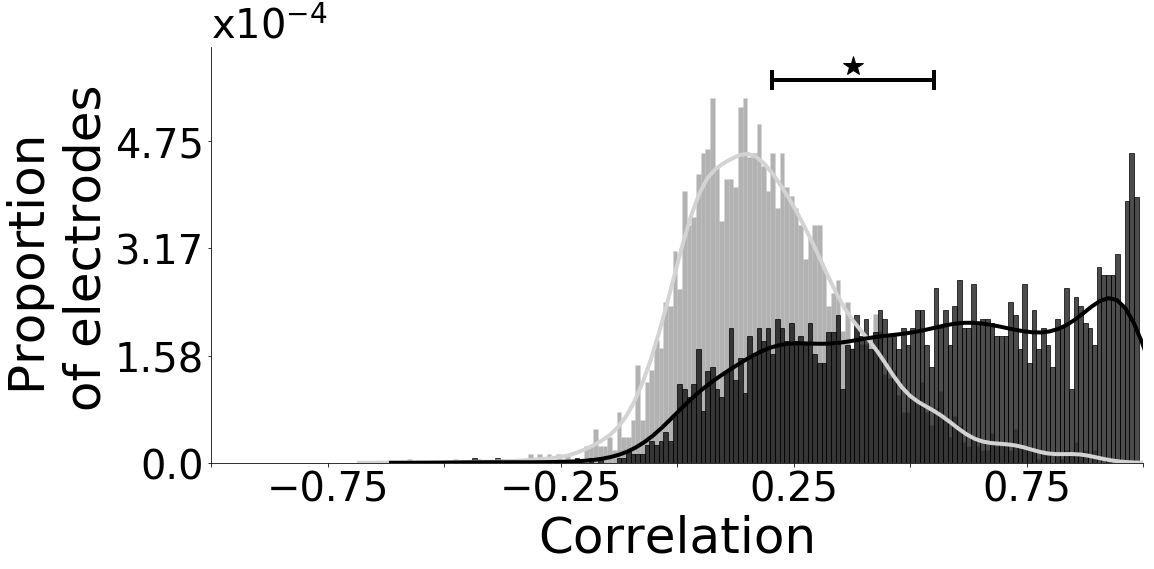

In [41]:
outfile = os.path.join(fig_dir, 'ram_all_hist.pdf')
plot.plot_2_histograms(corr_all_df, 'W_w_w', 'W_a_w', legend=False, outfile=outfile) 
plt.show()

In [42]:
RAM_df.head()

,R,W_a_a,Subject,Electrode,Sample rate,Samples,Total Electrodes,Sessions,Number thresholded,W_a_all,W_a_w,W_w_a,W_w_all,W_w_w,Thresholded electrodes,Total time (h),Average session length (h),Total electrodes,Proportion thresholded,Experiment
0,[-50.39 18.22 -43.3 ],0.242494,3,2,250.0,588250,72,1.0,14,0.300987,0.447637,-0.162586,0.236228,0.061755,72,0.654,0.654,86,0.163,RAM_CatFR1
1,[-46.17 18.21 -42.23],0.177056,3,1,250.0,588250,72,1.0,14,0.046046,0.478972,0.165845,0.275166,0.292074,72,0.654,0.654,86,0.163,RAM_CatFR1
2,[-57.19 19.07 -44.75],0.234188,3,4,250.0,588250,72,1.0,14,0.788364,0.916196,0.542039,-0.021315,0.117429,72,0.654,0.654,86,0.163,RAM_CatFR1
3,[-43.21 18.21 -41.49],0.336156,3,0,250.0,588250,72,1.0,14,0.536711,0.796827,0.005241,-0.211179,0.046857,72,0.654,0.654,86,0.163,RAM_CatFR1
4,[-54.86 15.87 40.38],0.024989,0,3,250.0,668750,85,1.0,19,0.426785,0.232029,0.187670,0.312530,0.378536,85,0.743,0.743,104,0.183,RAM_FR1


In [43]:
all_locs = plot.compile_df_locs(RAM_df['R'])
corr_all_locs = np.atleast_2d(RAM_df['W_a_w'])

In [44]:
grouped_results = corr_all_df.groupby('Subject')['W_w_w', 'W_a_w'].mean()
t_stat_group = stats.ttest_rel(grouped_results['W_a_w'],grouped_results['W_w_w'])

In [45]:
t_stat_group

Ttest_relResult(statistic=6.930163974276389, pvalue=4.5901965099743084e-07)

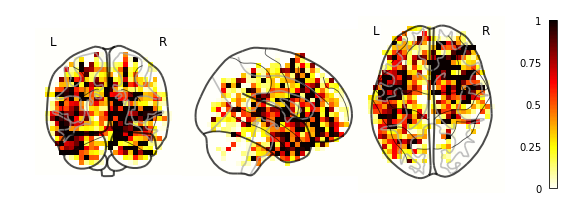

In [46]:
plot.interp_corr(all_locs,  np.atleast_2d(corr_all_locs), width=6, vox_size=6, outfile=None)

In [47]:
bo_nii = se.Brain(data=corr_all_locs, locs=all_locs)
bo_file = os.path.join(corrmap_nii_bo_dir, 'ram_all_corrmap')
bo_nii.save(bo_file)

## FR

In [48]:
str_find = '_FR1'
str_find
FR_df = RAM_df[RAM_df['Experiment'].str.contains(str_find)]

In [49]:
fr_locs = plot.compile_df_locs(FR_df['R'])

In [50]:
fr_subject = np.array([])
fr_within = np.array([])
fr_across = np.array([])
fr_R = np.array([])
for i , item in enumerate(FR_df['Subject'].values):
    fr_subject = np.append(fr_subject, item)
    fr_within = np.append(fr_within, FR_df['W_w_w'].iloc[i])
    fr_across = np.append(fr_across, FR_df['W_a_w'].iloc[i])
    fr_R = np.append(fr_R, FR_df['R'].iloc[i])

In [51]:
corr_fr_df = pd.DataFrame()
corr_fr_df['Subject'] = fr_subject
corr_fr_df['W_w_w'] = plot.r2z(fr_within)
corr_fr_df['W_a_w'] = plot.r2z(fr_across)
corr_fr_df['R'] = fr_R

one sided t test for across: 
Ttest_1sampResult(statistic=8.399336166572201, pvalue=1.8410073037611364e-08)
one sided t test for within: 
Ttest_1sampResult(statistic=8.709643386673946, pvalue=9.682191439179502e-09)
t test: 
Ttest_relResult(statistic=6.2352486121116755, pvalue=2.315676140498605e-06)


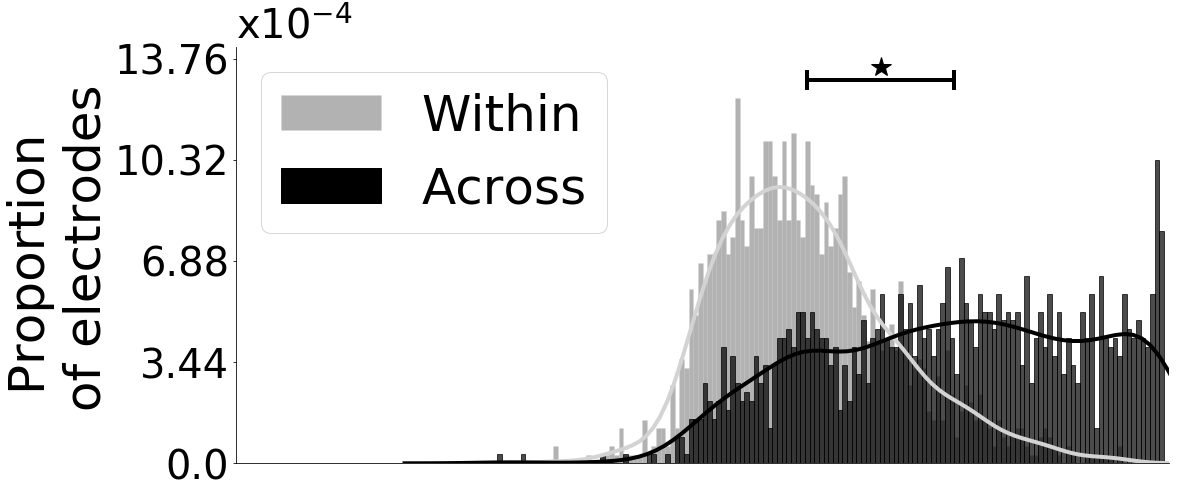

In [52]:
outfile = os.path.join(fig_dir, 'ram_fr_hist.pdf')
plot.plot_2_histograms(corr_fr_df, 'W_w_w', 'W_a_w', xticks=False, outfile=outfile) 
plt.show()

In [53]:
fr_locs = plot.compile_df_locs(corr_fr_df['R'])

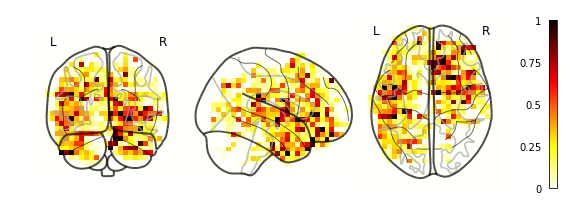

In [54]:
plot.interp_corr(fr_locs, np.atleast_2d(fr_across), width=6, vox_size=6, outfile=None)

In [55]:
bo_nii = se.Brain(data=fr_across, locs=fr_locs)
bo_file = os.path.join(corrmap_nii_bo_dir, 'ram_fr_corrmap')
bo_nii.save(bo_file)

## CatFR

In [56]:
str_find = '_CatFR1'
str_find
CatFR_df = RAM_df[RAM_df['Experiment'].str.contains(str_find)]

In [57]:
catfr_subject = np.array([])
catfr_within = np.array([])
catfr_across = np.array([])
catfr_R = np.array([])
for i , item in enumerate(CatFR_df['Subject'].values):
    catfr_subject = np.append(catfr_subject, item)
    catfr_within = np.append(catfr_within, CatFR_df['W_w_w'].iloc[i])
    catfr_across = np.append(catfr_across, CatFR_df['W_a_w'].iloc[i])
    catfr_R = np.append(catfr_R, CatFR_df['R'].iloc[i])

In [58]:
corr_catfr_df = pd.DataFrame()
corr_catfr_df['Subject'] = catfr_subject
corr_catfr_df['W_w_w'] = plot.r2z(catfr_within)
corr_catfr_df['W_a_w'] = plot.r2z(catfr_across)
corr_catfr_df['R'] = catfr_R

one sided t test for across: 
Ttest_1sampResult(statistic=9.744681768621069, pvalue=1.2425286882148373e-09)
one sided t test for within: 
Ttest_1sampResult(statistic=6.161811916669198, pvalue=2.756821235045249e-06)
t test: 
Ttest_relResult(statistic=6.6503478192699195, pvalue=8.744870451395446e-07)


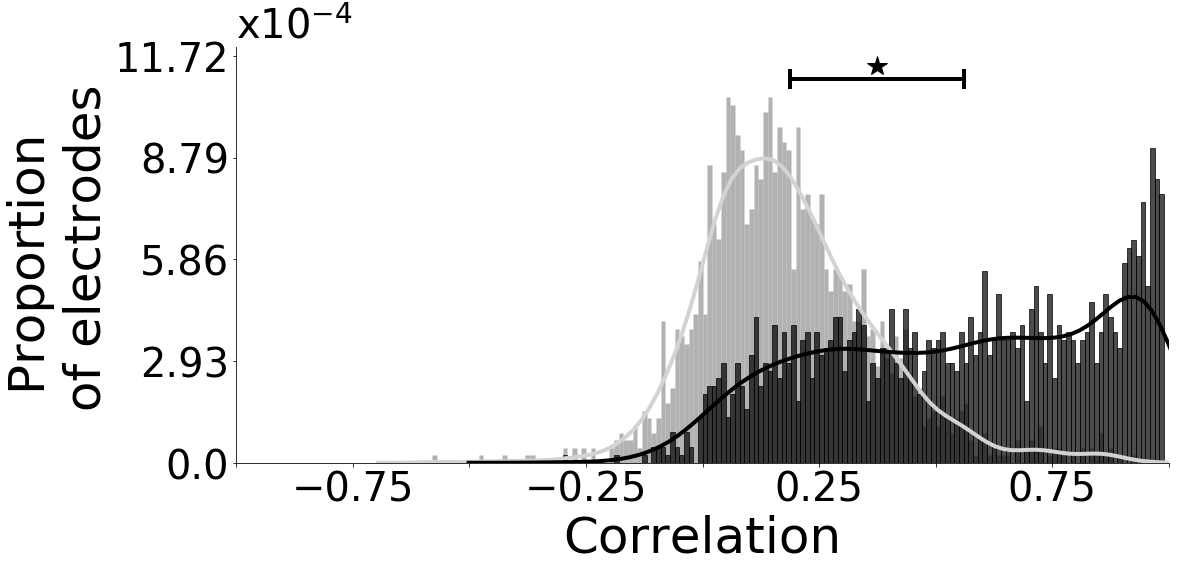

In [59]:
outfile = os.path.join(fig_dir, 'ram_catfr_hist.pdf')
plot.plot_2_histograms(corr_catfr_df, 'W_w_w', 'W_a_w', legend=False, outfile=outfile) 

In [60]:
catfr_locs = plot.compile_df_locs(corr_catfr_df['R'])

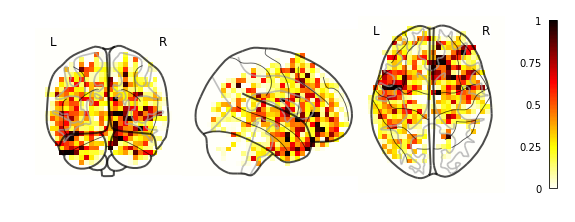

In [61]:
plot.interp_corr(catfr_locs, np.atleast_2d(catfr_across), width=6, vox_size=6, outfile=None)

In [62]:
bo_nii = se.Brain(data=catfr_across, locs=catfr_locs)
bo_file = os.path.join(corrmap_nii_bo_dir, 'ram_catfr_corrmap')
bo_nii.save(bo_file)